# Convolution ( 적분) _ review

 - Object Detection 
 - Object Recognition_ EG) 자율주행
 - 분류

- 주변의 값 고려 : 특징 추출하기위해 _ 순서를 바꾼다는 말과 동일 
- 이미지는 2차원 데이터
- 2차원데이터를 fully connected 망이라고함 
    - fully connected : 일렬로 서서 들어가는 것 

    
 [Filter] 를 적용해서 convolution 
- convolution 연산은 주변의 값을 고려하기위해 filter가 필요하다
    - filter의 역할 : 어떻게하면 특징을 잘 찾아낼것인가
- filter size : 큰놈; 큰특징 / 작은놈 : 작은특징 => 주변값 고려 j
    - 무슨 특징을 뽑아낼지는 필터가 알아서 
- filter의 갯수는 이미지 갯수 : 
    - 다양한 특징을 뽑아내려고 여러 필터를 적용
    
[ Padding ]
 **옵션**
- Valid  : N-F +1 
- Same : 기존행렬과 똑같이 _ stride 값이 1일때에는 기존행렬과 똑같이 나오지만,  stride가 2 x 2 면 반으로 쭌다 




# convolution

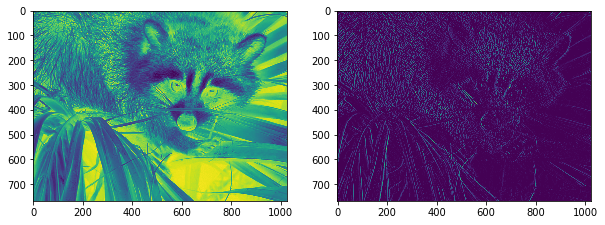

In [2]:
# 정보통신에서 노이즈를 없애고 복원할 때 cnn을 씀 
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage  #scipy에서 이미지 다루는 것
from scipy import misc  #misc : 사진것들 etc를 모아둔 것 
   # 255에서 빼는건 색 반전 _ 0~255   # gray true 흑백
    
img = 255 - sp.misc.face(gray=True).astype(float) #이미지, 동영상 # 255-
#edge detection filter -경계선 검출
k = np.zeros((2,2))
#1  -1
#1  -1
k[:,0] = 1;k[:,1]=-1
#convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0,sp.ndimage.filters.convolve(img,k))
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False) #격자나오는거 false
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()      

2 427 640 3


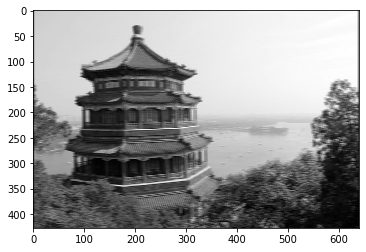

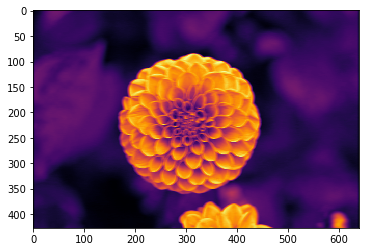

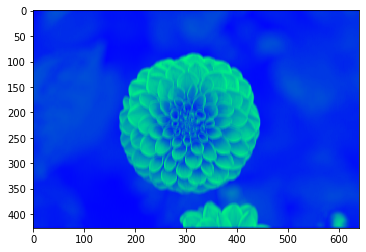

(2, 427, 640, 2)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf

# 1,height,width,channels # 차수일치를 위해 1 삽입 
#이미지 정규화 : 칼라를 255로 나누면 0~1 사이 값으로 변경됨


china = load_sample_image('china.jpg') #자동 4차원  0~1 :부동소숫점 이미지 , 0~255
flower = load_sample_image('flower.jpg')
dataset = np.array([china,flower],dtype = np.float32)
# 장수, 높이 , 넓이, 컬러 갯수(숫자)  #2장 427(높이) 640(가로) 3(RGB)
batch_size,height,width,channels = dataset.shape
print(batch_size,height,width,channels)
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)  #필터 (행,열,컬러,필터개수)
filters[:,3,:,0] = 1  #3번째열을 1로 바꾼다                 #이미지 (이미지개수,행,열,컬러개수)
filters[3,:,:,1] = 1 # 3번째 행을 1로 바꾼다 


#0 0 1 0 0 0 0
#0 0 1 0 0 0 0
#0 0 1 0 0 0 0
#0 0 1 0 0 0 0
#0 0 1 0 0 0 0
#0 0 1 0 0 0 0
#0 0 1 0 0 0 0

#주입변수shape=(None,height,width,channels) : 2,427, 640 , 3(컬러 

X = tf.placeholder(tf.float32,shape=(None,height,width,channels))  #None 는 2장이다  = 2차원

#이미지 포맷 결정 427,640          
convolution = tf.nn.conv2d(X,filters,strides=[1,1,1,1],padding = 'SAME')   # 컬러는 cmap !

####################여기까지 GRAPH 정의 (NODE 와 EDGE 결정)

with tf.Session() as sess:
    output = sess.run(convolution,feed_dict ={X:dataset}) #DATASET 2장들어감 
    

plt.imshow(output[0,:,:,1],cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1],cmap='inferno')
plt.show()
plt.imshow(output[1,:,:,0],cmap='winter')
plt.show()


type(output)
print(output.shape)

#필터가 2개 
#스트라이드가 1일 때(2, 427, 640, 2)

#스트라이드가 2일때 (2, 214, 320, 2)  # 427에서 213.5 => 214

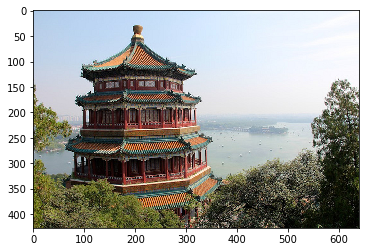

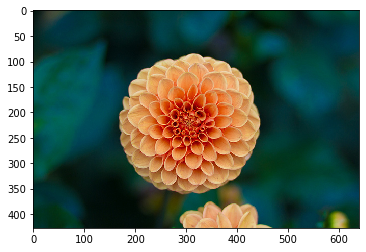

In [4]:
plt.imshow(china)

plt.show()
plt.imshow(flower)

## 문제 : output으로 나온이미지를  찍어봐라

In [5]:
def plot_image(image):
    plt.imshow(image,cmap="gray",interpolation='nearest')
    plt.axis('off')
    

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation='nearest')
    plt.axis('off')

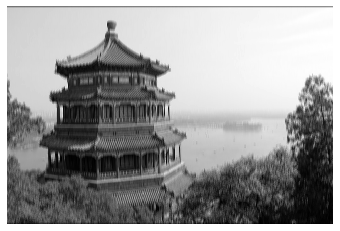

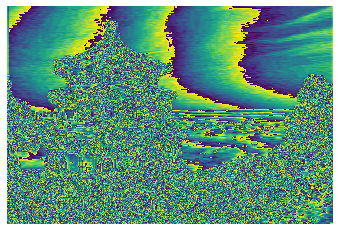

In [6]:
# 내답
plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plot_color_image(output[0,:,:,1])

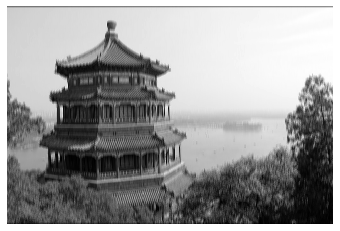

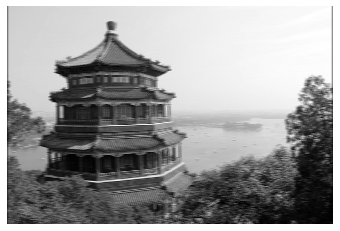

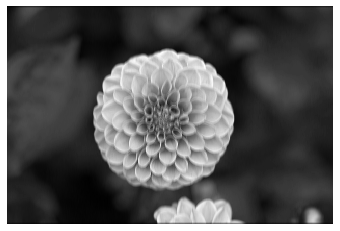

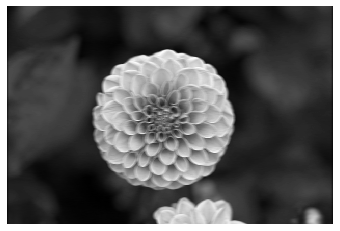

In [7]:
# 쌤답 
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

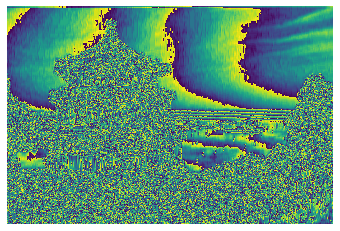

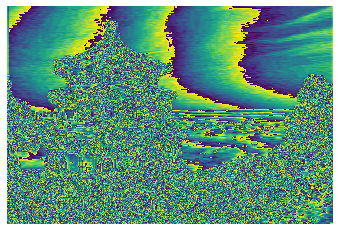

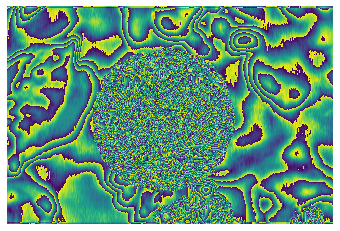

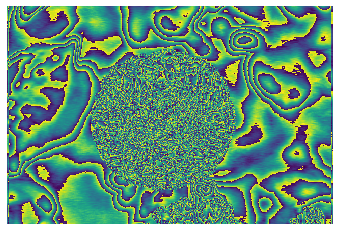

In [8]:
# 쌤답 
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_color_image(output[image_index,:,:,feature_map_index])
        plt.show()

# pooling

2 427 640 3


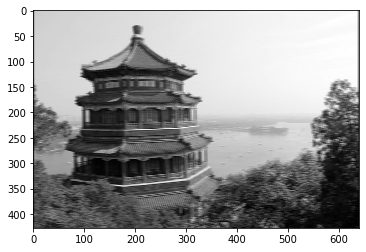

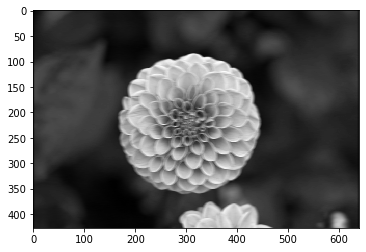

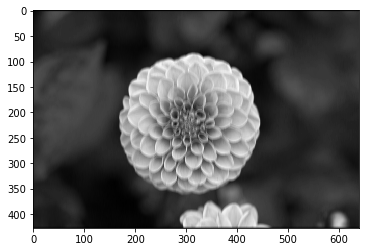

(2, 427, 640, 2)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
# 1, height, width, channels <=차수일치
china =load_sample_image("china.jpg")#자동 4차원 0~1(부동소수점 사이즈), 0~255(int형 사이즈)
#이미지 정규화

flower= load_sample_image("flower.jpg")
dataset= np.array([china,flower], dtype=np.float32)
# 페이지수, 높이, 넓이, 컬러수(RGB) => 컬러는 숫자

batch_size, height,width, channels =dataset.shape
print(batch_size, height,width, channels)#2 427(행) 640(열) 3
                                         #  높이, 가로
filters=np.zeros(shape=(7,7,channels,2),dtype=np.float32)
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0       x 2개
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0

filters[:,3,:,0]=1
filters[3,:,:,1]=1

#주입변수 2 427 640 3 (컬러) => 단색
X=tf.placeholder(tf.float32,shape=(None, height, width, channels))

#이미지 포멧이 결정되어 있음 427 640
#VALID : 421x634
#strides 427 214
convolution=tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding="SAME")
#사이즈 감소
max_pool =tf.nn.max_pool(convolution, ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

##############################################################################
# graph (mode + edge)
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
plt.imshow(output[0,:,:,1],cmap="gray")
plt.show()
plt.imshow(output[1,:,:,1],cmap="gray")
plt.show()
plt.imshow(output[1,:,:,0],cmap="gray")
plt.show()
type(output)
print(output.shape)
# 필터가 2개
# 스트라이드 2 427 640 2

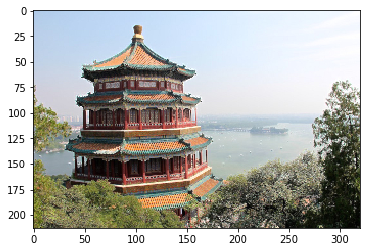

In [10]:
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8))   #채널을 그대로두기때문에 컬러로 출력이 된다 (원본데이터에 풀링만 진행했기때문에 칼러는 그대로있다)
plt.show()   

plt.imshow(first_image[0])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


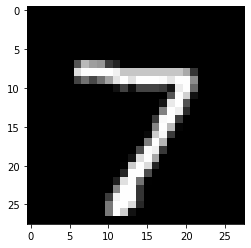

In [12]:
# 채널 분리 

%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets('/tmp/data/',one_hot=True)

# 1장의 이미지 출력 
first_image =mnist.test.images[0] # 범위 지정하면 5장 뽑을 수 있음 
first_image = np.array(first_image,dtype = 'float')     
pixels = first_image.reshape((28,28))
plt.imshow(pixels,cmap='gray')
plt.show()

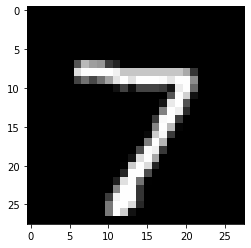

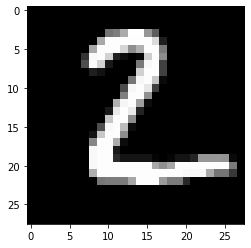

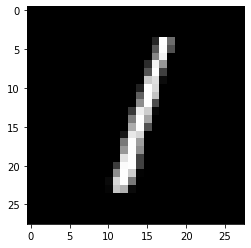

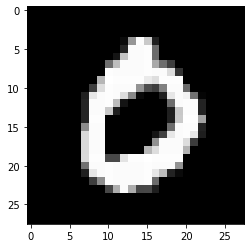

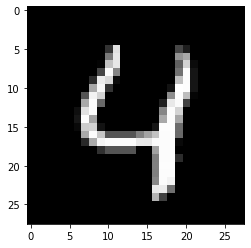

In [13]:
# 5장의 이미지 출력 
first_image =mnist.test.images[0:5] # 범위 지정하면 5장 뽑을 수 있음 
first_image = np.array(first_image,dtype = 'float')
for i in range(5):
    pixels = first_image[i].reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()

[drop out]
- 과적합 방지를 위해서  계산의 일부를 버리는 것 . hyper parameter


# mnist

Convolution layer와 pooling layer가 두번 반복된 구조를 통해 나온 결과를 Fully-Connected layer를 통해 10개의 숫자들 중에서 예측합니다

출처: https://doorbw.tistory.com/155 [Tigercow.Door]

In [14]:
learning_rate = 0.001 #optimizer 사용
num_steps = 500       #epoch 
batch_size = 128  #mini batch size
display_step =10  #시각화

num_input = 784   #이미지 28x28 => fully connected 해서 일렬로 데이터를 만들었다 
num_classes =10  #one-hot encoding
dropout =0.75     #과적합 방지를 위해 임의적으로 25% 는 버림   # 25% 계산안해도 딥러닝은 잘돌아감 


# 이름을 지정하는 이유는 나중에 메모리 위치를 찾기 위해서 

X = tf.placeholder(tf.float32,[None,num_input],name = 'input') # 훈련데이터 
Y = tf.placeholder(tf.float32,[None,num_classes],name = 'output') #종속변수 
keep_prob = tf.placeholder(tf.float32,name ='keep')

In [15]:
# 컴퓨터에서는 한번이상 반복되면 함수화한다
# activation function  은 마지막에 한번만 호출 : 이를 이용해서 회귀, 분류
#multi-layer : xor 문제 해결하는 것은 activation function 을 이용해서 비선형으로 문제해결
# CNN 은 DEEP 할 수록 결과가 좋다 

 #이게 여러번 쌓이면 레이어마다 쌓임 
def conv2d(x,W,b,strides =1):  #conv에 필요한 변수들 받기   # 가중치는  필터를 이야기함 
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x = tf.nn.bias_add(x,b)  #y = ax + b
    return tf.nn.relu(x)  #relu 적용해주기 => # 비선형 mapping 

#pooling
def maxpool2d(x,k=2):  #k값은 어떤 사이즈로 pooling 할지 정하는 것   #max 와 average 가 있다 
    return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')

In [16]:
# 쌓아보자  #pooling 은 사이즈를 줄여줌 

def conv_net(x,weights,biases,dropout): #128x784
    x = tf.reshape(x,shape=[-1,28,28,1]) # 원래 이미지 형태 
    # 128x28x28x1      필터가 32장 :  #필터사이즈  [5,5,1,32] 
    #하나의 5x5 이미지에 대해서 32개의 필터로 각기 다른 특징 추출 
    #_ 32개의 가중치를 훈련하면서 32개의 특징을 추출
    
    conv1 = conv2d(x,weights['wc1'],biases['bc1']) #128 x28x28x32
    conv1 = maxpool2d(conv1,k=2) #128x14x14x32(특징) #사이즈는 반으로 줄지만 특징은 줄지않음
    conv2 = conv2d(conv1,weights['wc2'],biases['bc2']) #128x14x14x64
    conv2= maxpool2d(conv2,k=2) #128x7x7x64 #전체를 다 곱한값 : 일렬로 만든것 
    
    
    #7*7*64(0번사이즈) , 1024 # fully connected
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].get_shape().as_list()[0]])
    
    #가중치 계산 7*7*64,1024 => 128x1024
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1=tf.nn.dropout(fc1,dropout)  #75%만 사용  # 25%는 dropout
    #128 x 1024 , 1024 x 10 => 128x10
    out=tf.add(tf.matmul(fc1,weights['out']),biases['out'])   #결과는 128x10 
    return out

#CNN  특징 추출 => FFNN ( feed forward neural network)

#cnn 
- 이미지 특징 추출
- 주변을 고려한 특징추출


conv2d 가 나오면 pooling이 항상 따라옴 
왜냐하면 특징을 추출했으면 사이즈 줄여줘도 무방하기때문에 

복잡한이미지일수록 특징을 많이 추출해줘야함  왜냐하면 
cf)-복잡한 이미지란 : mnist처럼 뽑아내는 타겟이 10개보다 많은 100~1000개 등

In [17]:
weights={
    'wc1':tf.Variable(tf.random_normal([5,5,1,32])), #32는 out차수
    'wc2':tf.Variable(tf.random_normal([5,5,32,64])),
    'wd1':tf.Variable(tf.random_normal([7*7*64,1024])),
    'out':tf.Variable(tf.random_normal([1024,num_classes]))
}


biases = {
    'bc1':tf.Variable(tf.random_normal([32])),
    'bc2':tf.Variable(tf.random_normal([64])),
    'bd1':tf.Variable(tf.random_normal([1024])),
    'out':tf.Variable(tf.random_normal([num_classes]))
}

In [18]:
logits = conv_net(X,weights,biases,keep_prob) # 128x10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

train_op = optimizer.minimize(loss_op)
correct_pred = tf. equal(tf.argmax(prediction,1),tf.argmax(Y,1))  #argmax 는 가장 큰 확률의 '값' 하나를 출력 
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:

with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op,feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
        if step% display_step ==0 or step ==1:
            loss,acc = sess.run([loss_op,accuracy],
                               feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
            print('Step'+str(step) + ',Minibatch Loss ='+
                 '{:.4f}'.format(loss) + ',Training Accuracy =' +
                 '{:.3f}'.format(acc))
            print('Testing Accuracy:',
                 sess.run(accuracy,feed_dict={X:mnist.test.images[:256],
                                             Y:mnist.test.labels[:256],
                                             keep_prob:1.0}))

Step1,Minibatch Loss =53079.3984,Training Accuracy =0.133
Testing Accuracy: 0.0703125
Step10,Minibatch Loss =30885.1152,Training Accuracy =0.336
Testing Accuracy: 0.2734375
Step20,Minibatch Loss =12053.7168,Training Accuracy =0.500
Testing Accuracy: 0.4375
Step30,Minibatch Loss =11198.6855,Training Accuracy =0.625
Testing Accuracy: 0.625
Step40,Minibatch Loss =3975.2429,Training Accuracy =0.789
Testing Accuracy: 0.7109375
Step50,Minibatch Loss =6366.3340,Training Accuracy =0.750
Testing Accuracy: 0.79296875
Step60,Minibatch Loss =3939.0056,Training Accuracy =0.836
Testing Accuracy: 0.82421875


KeyboardInterrupt: 

## 문제 : 테스트 데이터 100번부터 20개의 데이터를  예측해보시오

- 예측된 데이터를 출력해보세요

- 참고 : https://doorbw.tistory.com/155


- cf) keras cnn 이미지 분류 https://lhh3520.tistory.com/3761

In [20]:
logits = conv_net(X,weights,biases,keep_prob) # 128x10
prediction = tf.nn.softmax(logits,name ='prediction')
loss_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

train_op = optimizer.minimize(loss_op)
correct_pred = tf. equal(tf.argmax(prediction,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name = 'accuracy')
init = tf.global_variables_initializer()

tf.add_to_collection('accuracy',accuracy)   # 이름주기
tf.add_to_collection('Xi',X)
tf.add_to_collection('Yi',Y)
tf.add_to_collection('prediction',prediction)
init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op,feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
        if step% display_step ==0 or step ==1:
            loss,acc = sess.run([loss_op,accuracy],
                               feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
            print('Step'+str(step) + ',Minibatch Loss ='+
                 '{:.4f}'.format(loss) + ',Training Accuracy =' +
                 '{:.3f}'.format(acc))
            save_path = saver.save(sess,'data/cnn_model.ckpt')  #모델이 다 된 후에 가중치가 결정되면, 저장 및 경로 지정 
            print('Testing Accuracy:',
                 sess.run(accuracy,feed_dict={X:mnist.test.images[:256],
                                             Y:mnist.test.labels[:256],
                                             keep_prob:1.0}))
            
            print('예측:',sess.run(tf.argmax(prediction,1),feed_dict={X:mnist.test.images[100:120],
                                                                  Y:mnist.test.labels[100:120],keep_prob:1.0}))

In [21]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x,Y:batch_y, keep_prob:dropout})
        if step % display_step == 0 or step ==1:
            loss, acc = sess.run([loss_op, accuracy],feed_dict={X:batch_x,Y:batch_y, keep_prob:1.0})
            print('Step : {}, Minibatch Loss : {:.4f}, Training Accuracy : {:.3f}'.format(str(step), loss, acc))
            save_path = saver.save(sess,'data/cnn_model.ckpt')  #모델이 다 된 후에 가중치가 결정되면, 저장 및 경로 지정
    print('Testing Accuracy : ', sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))
    print('예측 : ', sess.run(tf.argmax(prediction,1), feed_dict={X:mnist.test.images[100:121], Y:mnist.test.labels[100:121], keep_prob:1.0}))

Step : 1, Minibatch Loss : 59203.7656, Training Accuracy : 0.133
Step : 10, Minibatch Loss : 42974.1523, Training Accuracy : 0.266
Step : 20, Minibatch Loss : 13381.1562, Training Accuracy : 0.578
Step : 30, Minibatch Loss : 8001.1279, Training Accuracy : 0.672
Step : 40, Minibatch Loss : 6163.7510, Training Accuracy : 0.711
Step : 50, Minibatch Loss : 4488.9727, Training Accuracy : 0.766
Step : 60, Minibatch Loss : 3948.3608, Training Accuracy : 0.789
Step : 70, Minibatch Loss : 2744.5029, Training Accuracy : 0.836
Step : 80, Minibatch Loss : 3081.2363, Training Accuracy : 0.875
Step : 90, Minibatch Loss : 4750.9189, Training Accuracy : 0.820
Step : 100, Minibatch Loss : 1203.5804, Training Accuracy : 0.922
Step : 110, Minibatch Loss : 2280.9763, Training Accuracy : 0.906
Step : 120, Minibatch Loss : 1855.4138, Training Accuracy : 0.891
Step : 130, Minibatch Loss : 3021.5981, Training Accuracy : 0.852
Step : 140, Minibatch Loss : 1298.3337, Training Accuracy : 0.930
Step : 150, Miniba

## 모델 

In [22]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph("data/cnn_model.ckpt.meta")
new_saver.restore(sess, "data/cnn_model.ckpt")
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0")
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")

result = sess.run(accuracy, feed_dict={Xi: mnist.test.images[:256],
                                      Yi: mnist.test.labels[:256],
                                      keep:1.0})
print(result)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt


C:\Users\ICT01_06\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.97265625


In [23]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess,'data/cnn_model.ckpt')
tf.get_default_graph()

Xi=sess.graph.get_tensor_by_name('input:0') # : 뒤에 번호는 잔치번호?
Yi =sess.graph.get_tensor_by_name('output:0')
keep = sess.graph.get_tensor_by_name('keep:0')
accuracy = sess.graph.get_tensor_by_name('accuracy:0')
result = sess.run(accuracy,feed_dict={Xi:mnist.test.images[:256],
                                     Yi:mnist.test.labels[:256], keep:1.0})

print(result)

INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.97265625


## 문제: 저장된 모델을 로딩한 다음 
테스트 데이터 100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시오 

In [28]:
print('Testing Accuracy : ', sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256],   # accuracy 는 1,0  = true or false 
                                                           Yi:mnist.test.labels[:256], keep_prob:1.0}))

#argmax 는 가장 큰 확률의 '값' 하나를 출력 
print('예측 : ', sess.run(tf.argmax(prediction,1), feed_dict={Xi:mnist.test.images[100:121], 
                                                             Yi:mnist.test.labels[100:121], keep_prob:1.0}))

Testing Accuracy :  0.97265625
예측 :  [6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5]
